# BETA DISTRIBUTION 

    -  Beta distribution is a continuous probability distribution that models random variables with standard values falling inside a finite interval [0,1] with two parameters of α (alpha) and β (beta) to control the distribution shape

    - Beta distribution is best for representing a probabilistic distribution of probabilities: the case where we don't know what a probability is in advance, but we have some reasonable guesses

    - It is the conjugate prior distribution for Bernoulli, Binomial, and Geometric distributions. The probability density function (PDF) of Beta distribution is as below:

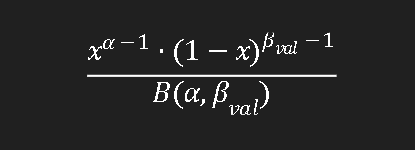

        pdf = np.power(x, alpha - 1) * np.power(1 - x, beta_val - 1) / beta_func(alpha, beta_val)       

- x is the random variable (between 0 and 1)
- α (alpha) and β (beta) are the shape parameters of the distribution
- B(α,β) is the beta function, which acts as a normalization constant to ensure that the integral of the PDF over the entire range of x is equal to 1
- The expected value (mean) of a Beta distribution with two parameters of α (alpha) and β (beta):
    - α/(α+β)

In [1]:
# importing basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

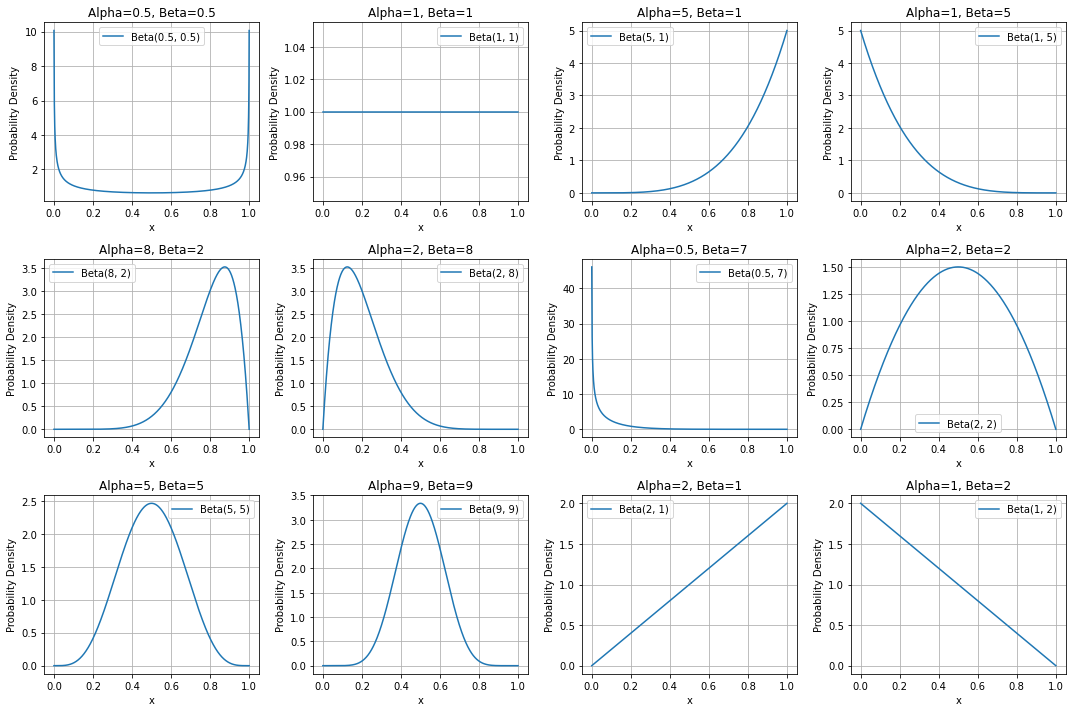

In [2]:
# define the range of alpha and beta values
from scipy.special import beta as beta_func
alpha_values = [0.5, 1, 5, 1, 8, 2, 0.5, 2, 5, 9, 2, 1]
beta_values = [0.5, 1, 1, 5, 2, 8, 7, 2, 5, 9, 1, 2]
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
x = np.linspace(0, 1, 1000)

# iterating over various alpha and beta values to plot the different beta distributions
for i in range(3):
    for j in range(4):
        idx = i * 4 + j
        alpha = alpha_values[idx]
        beta_val = beta_values[idx]
        
        # calculating & plotting the probability density function (PDF) of the beta distribution
        pdf = np.power(x, alpha - 1) * np.power(1 - x, beta_val - 1) / beta_func(alpha, beta_val)
        ax = axes[i, j]
        ax.plot(x, pdf, label=f'Beta({alpha}, {beta_val})')
        ax.set_title(f'Alpha={alpha}, Beta={beta_val}')
        ax.set_xlabel('x')
        ax.set_ylabel('Probability Density')
        ax.legend()
        ax.grid(True)

plt.tight_layout()
plt.show()


    - Beta distribution is flexible and can model a wide range of shapes, making it useful in various statistical applications
    
    - Usually used in applications such as Bayesian A/B testing, modeling proportions, and generating random variables constrained to a specific interval

# BAYESIAN STATISTICS BENEFITS

#### - Flexibility with Sample Sizes: 
    Bayesian methods can handle small sample sizes more effectively compared to frequentist methods. This can be particularly advantageous in industries where tests might need to be conducted with limited data due to rapidly changing conditions or the need for quick decision-making.
#### - Incorporation of Prior Knowledge:
    Bayesian A/B testing allows for the incorporation of prior knowledge or beliefs about the parameters being tested. In e-commerce, where there might be historical data or domain expertise available, this can provide valuable insights and improve the efficiency of testing.
#### - Continuous Learning/Adaptation:
    Bayesian methods naturally support continuous learning and adaptation. As new data becomes available, the posterior distribution can be updated, allowing for iterative refinement of hypotheses and decisions. This is crucial in fast-moving industries where conditions and user behavior can change rapidly.
#### - Intuitive Interpretation:
    Bayesian inference provides intuitive interpretations of uncertainty through posterior distributions. This can help stakeholders understand the level of confidence in the results and make informed decisions based on the probabilities of different outcomes.

# CLICK-THROUGH RATE (CTR) AB TESTING

In [3]:
# lets say we have data of two products (A & B) and we want to check its Click-Through Rate (CTR) to determine which one has better performance
clicks_df = pd.read_csv('clicks.csv')

# showing the current clicks data general information
display(clicks_df.info())
display(clicks_df.shape)
clicks_df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product         10000 non-null  object
 1   banner_clicked  10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


None

(10000, 2)

,product,banner_clicked
8510,B,0
9982,A,0
3424,A,1
5746,B,0
7890,B,1


banner_clicked                                                
        total_unique_viewers total_clicks       CTR       std min median max
product                                                                     
A                       5028          654  0.130072  0.336416   0    0.0   1
B                       4972          580  0.116653  0.321039   0    0.0   1

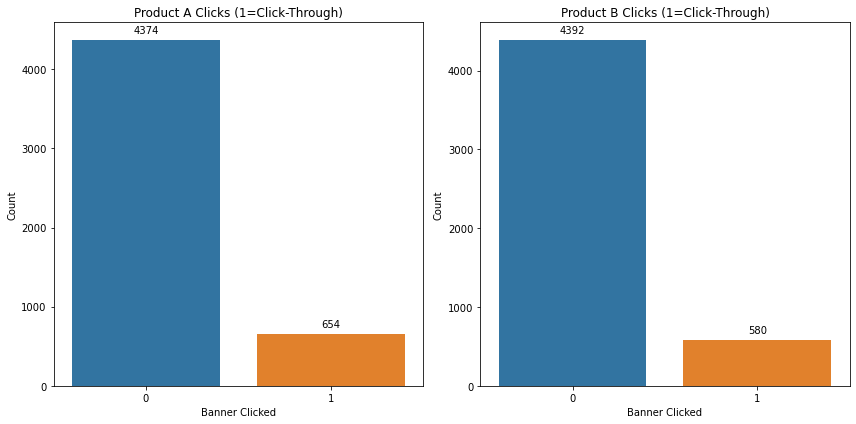

In [4]:
# we try to describe its general statistics 
display(
    clicks_df.groupby('product')\
        .agg({'banner_clicked':['count','sum','mean','std','min','median','max']})\
        .rename(columns={'count':'total_unique_viewers', 'sum':'total_clicks', 'mean':'CTR'})
)   

# plot for Product A clicks
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x='banner_clicked', data=clicks_df[clicks_df['product'] == 'A'], ax=axes[0])
axes[0].set_title('Product A Clicks (1=Click-Through)')
axes[0].set_xlabel('Banner Clicked')
axes[0].set_ylabel('Count')
for p in axes[0].patches:
    axes[0].annotate(format(p.get_height(), '.0f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 10), 
                      textcoords = 'offset points')

# plot for Product B clicks
sns.countplot(x='banner_clicked', data=clicks_df[clicks_df['product'] == 'B'], ax=axes[1])
axes[1].set_title('Product B Clicks (1=Click-Through)')
axes[1].set_xlabel('Banner Clicked')
axes[1].set_ylabel('Count')
for p in axes[1].patches:
    axes[1].annotate(format(p.get_height(), '.0f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 10), 
                      textcoords = 'offset points')

plt.tight_layout()
plt.show()


In [5]:
# Coefficient of Variation (CV) for both products
print("CV of Product A:",0.336416/0.130072)
print("CV of Product B:",0.321039/0.116653)

CV of Product A: 2.5863829263792364
CV of Product B: 2.7520852442714716


    - It appears that the average CTR for Product A (approximately 13.0%) is relatively higher compared to the average CTR of product B (approximately 11.7%). However, the Coefficient of Variation (CV) of those two products is quite high (CV>1) meaning that the point estimator is less precise due to higher spread/variation

    - Bayesian statistics provides a more direct probabilistic interpretation of uncertainty, allowing for statements about the probability of hypotheses given the data.

Assuming that the expected value (mean) for the ecommerce's CTR: 0.125


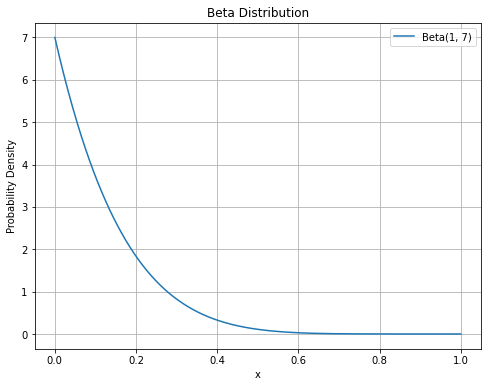

In [6]:
# we now take the Bayesian approach for AB Testing
# assuming the Beta distribution parameters for the ecommerce CTR's conjugate prior distribution as below
alpha = 1
beta_val = 7
expected_CTR = alpha/(alpha+beta_val)
print(f"Assuming that the expected value (mean) for the ecommerce's CTR: {expected_CTR}")

# calculating & plotting the probability density function (PDF) of the distribution
x = np.linspace(0, 1, 1000)
pdf = np.power(x, alpha - 1) * np.power(1 - x, beta_val - 1) / beta_func(alpha, beta_val)
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, label=f'Beta({alpha}, {beta_val})')
plt.title('Beta Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# setting up the Bayesian function for AB testing with the previous Beta distribution assumption
def bayes_ab_test(data, group_col, group_A, group_B, target, alpha=1, beta=7, n_samples=10000):
    
    # setting up the variables & its random seed
    np.random.seed(88)
    a_clicks = data[data[group_col] == group_A][target]
    b_clicks = data[data[group_col] == group_B][target]
    a_exposures = len(a_clicks)
    b_exposures = len(b_clicks)
    
    # Calculating posterior mean for both products
    a_posterior_mean = np.mean(np.random.beta(alpha + a_clicks.sum(), beta - a_clicks.sum() + a_exposures, size=n_samples))
    b_posterior_mean = np.mean(np.random.beta(alpha + b_clicks.sum(), beta - b_clicks.sum() + b_exposures, size=n_samples))
    
    # Computing the probability that Product A has a better CTR than Product B
    prob_a_better = np.mean(np.random.beta(alpha + a_clicks.sum(), beta - a_clicks.sum() + a_exposures, size=n_samples) > 
                            np.random.beta(alpha + b_clicks.sum(), beta - b_clicks.sum() + b_exposures, size=n_samples))
    
    return {'a_posterior_mean': a_posterior_mean,
            'b_posterior_mean': b_posterior_mean,
            'prob_a_better': prob_a_better}

In [8]:
# displaying results assuming the beta distribution for ecommerce CTR distribution having alpha=1 & beta=7
bayes_ab_test(clicks_df, 'product', 'A', 'B', 'banner_clicked', alpha=1, beta=7, n_samples=10000)

{'a_posterior_mean': 0.1301184531451088,
 'b_posterior_mean': 0.11669093866466715,
 'prob_a_better': 0.9795}

    - a_posterior_mean: The posterior mean Click-Through Rate (CTR) for Product A is approximately 13.0%. This means that, based on the observed data and the prior assumptions, it's estimated that the average CTR for Product A is around 13.0%.

    - b_posterior_mean: Similarly, this represents the posterior mean CTR for Product B. It's approximately 11.7%. This means that the updated average CTR for Product B is around 11.7%.

    - prob_a_better: The probability that Product A has a better CTR than Product B is 97.95%. In other words, based on the Bayesian approach, there's a high probability (almost 98%) that the CTR for Product A is better than that of Product B.

    - In conclusion, the Bayesian interpretation suggests that Product A is more likely to have a higher CTR compared to Product B with a high level of probability.